# Fast cosine and sine transforms

El paquete $\texttt{numpy.fft}$ no incluye funciones para transformadas rápidas de seno y coseno. 

Una transformación discreta de Fourier de cosenos es equivalente a una transformada discreta de Fourier ordinaria sobre un conjunto de puntos que son simétricos en torno al punto medio del intervalo de transformación. El tipo de DFCT más común cumple

$$a_k = \sum_{n=0}^{N-1} y_n \cos\left( \dfrac{\pi k (n+1/2)}{N} \right), \quad y_n = \dfrac{1}{N} \left[ a_0 + 2 \sum_{k=0}^{N/2-1} a_k \cos\left( \dfrac{\pi k (n+1/2)}{N} \right) \right],$$
que corresponde a puntos que satisfacen $y_{2N-1-n} = y_n$ con $n=0,\dots,N-1$. 

Dados $N$ puntos, calculamos la transformada de cosenos mediante *espejando* los puntos para crear un arreglo simétrico del doble del tamaño, realizando una DFFT en el resultado y descartando las partes imaginarias de los coeficientes.

In [1]:
#Compute the 1-D discrete Fourier Transform for real input.
from numpy.fft import rfft 
from numpy import empty, arange, exp, real, pi

In [2]:
def dct(y):
    N = len(y)
    y2 = empty(2*N, float)
    
    for n in range(N):
        y2[n] = y[n]
        y2[2*N-1-n] = y[n]
    c = rfft(y2)
    ϕ = exp(-1j*pi*arange(N)/(2*N))
    return real(ϕ*c[:N])
# ϕ corresponde al factor de fase

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Fourier filtering and smoothing

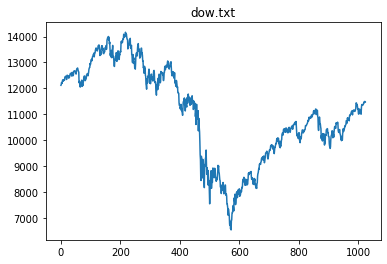

In [4]:
dow = np.loadtxt("cpresources/dow.txt")

plt.plot(dow)
plt.title('dow.txt')
plt.show()

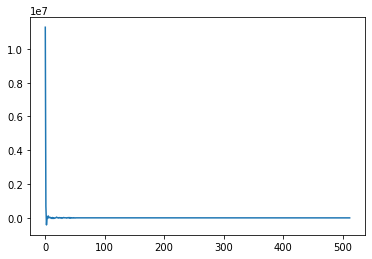

In [10]:
# RFFT de dow
c = rfft(dow)
N = len(c)
# 90% a cero
c[10*N//100:-1] = 0
plt.plot(real(c))
#plt.ylim([0,0.2])
plt.show()

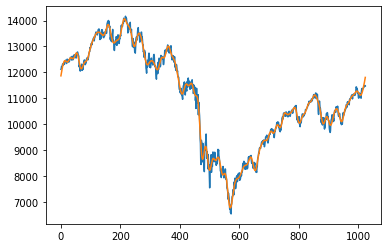

In [11]:
# IRFFT de c
y90 = np.fft.irfft(c)

plt.plot(dow)
plt.plot(y90)
plt.show()

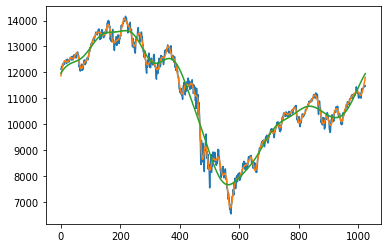

In [13]:
# RFFT de dow
c = rfft(dow)
N = len(c)
# 98% a cero
c[2*N//100:-1] = 0
# IRFFT de c
y98 = np.fft.irfft(c)
plt.plot(dow)
plt.plot(y90)
plt.plot(y98)
plt.show()

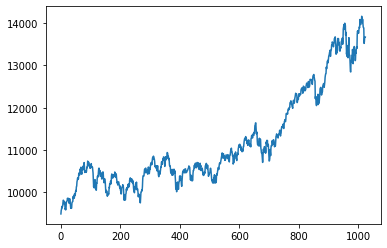

In [14]:
dow2 = np.loadtxt('cpresources/dow2.txt')

plt.plot(dow2)
plt.show()

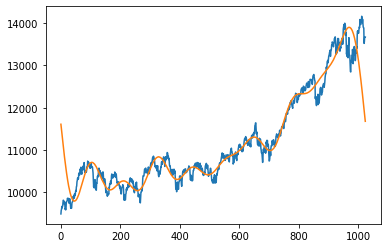

In [15]:
c2 = rfft(dow2)
N2 = len(c2)
c2[N2*2//100: -1] = 0
y2 = np.fft.irfft(c2)
plt.plot(dow2)
plt.plot(y2)
plt.show()
# LARGE DEVIATIONS :D

In [16]:
import dcst as dc

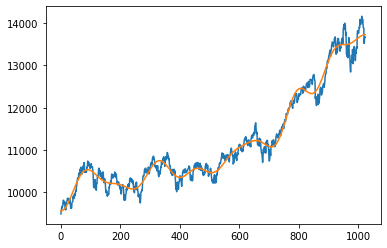

In [17]:
y3 = dc.dct(dow2)
N3 = len(y3)
y3[N3*2//100: -1] = 0
u3 = dc.idct(y3)
plt.plot(dow2)
plt.plot(u3)
plt.show()
# No fuerza al valor de la función a ser la misma 
# a ambos extremos
# El gradiente es cero en los extremos